Jupyter notebook transcription of 
http://www.physics.utah.edu/~bolton/python_lens_demo/

In [1]:
%matplotlib inline

original python files

In [2]:
ls *.py

lensdemo_funcs.py   lensdemo_script.py


Import the necessary packages

In [3]:
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import lensdemo_funcs as ldf

In [4]:
mp.rcParams['figure.figsize'] = (12, 8)

Package some image display preferences in a dictionary object, for use below:

In [5]:
myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': mp.cm.gnuplot}

# Test

Make some x and y coordinate images:

In [34]:
nx = 501
ny = 501
xhilo = [-2.5, 2.5]
yhilo = [-2.5, 2.5]
x = (xhilo[1] - xhilo[0]) * np.outer(np.ones(ny), np.arange(nx)) / float(nx-1) + xhilo[0]
y = (yhilo[1] - yhilo[0]) * np.outer(np.arange(ny), np.ones(nx)) / float(ny-1) + yhilo[0]

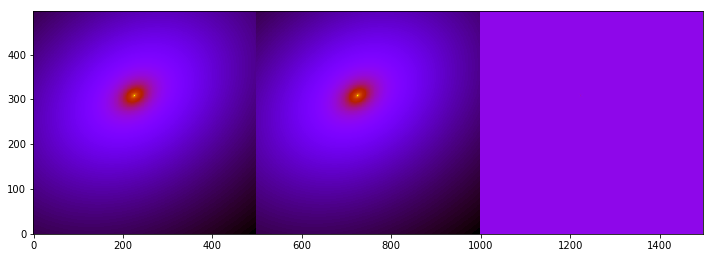

In [35]:
# The following lines can be used to verify that the SIE potential gradient
# function actually computes what is is supposed to compute!
# Feel free to disregard...

# Pick some arbitrary lens parameters:
lpar = np.asarray([1.11, -0.23, 0.59, 0.72, 33.3])
# Compute the gradients:
(xg, yg) = ldf.sie_grad(x, y, lpar)
# Compute convergence as half the Laplacian of the potential from the gradients:
kappa_g = 0.5 * ( (xg[1:-1,2:] - xg[1:-1,0:-2]) / (x[1:-1,2:] - x[1:-1,0:-2]) +
                  (yg[2:,1:-1] - yg[0:-2,1:-1]) / (y[2:,1:-1] - y[0:-2,1:-1]))
# Compute the expected analytic convergence for these lens parameters:
(xn, yn) = ldf.xy_rotate(x, y, lpar[1], lpar[2], lpar[4])
kappa_a = 0.5 * lpar[0] / np.sqrt(lpar[3]*xn[1:-1,1:-1]**2 + yn[1:-1,1:-1]**2 / lpar[3])

f = plt.imshow(np.hstack((np.log(kappa_g), np.log(kappa_a), np.log(kappa_g) - np.log(kappa_a))),
             vmax=np.log(kappa_g).max(), vmin=np.log(kappa_g).min(), **myargs)
# OK, looks good!  Some disagreement in the center, which is to be expected.

# First lens

Set some Gaussian blob image parameters and pack them into an array

In [8]:
g_amp = 1.0   # peak brightness value
g_sig = 0.05  # Gaussian "sigma" (i.e., size)
g_xcen = 0.0  # x position of center
g_ycen = 0.0  # y position of center
g_axrat = 1.0 # minor-to-major axis ratio
g_pa = 0.0    # major-axis position angle (degrees) c.c.w. from x axis
gpar = np.array([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])

The un-lensed Gaussian image:

Set some SIE lens-model parameters and pack them into an array:

In [9]:
l_amp = 1.   # Einstein radius
l_xcen = 0.0  # x position of center
l_ycen = 0.0  # y position of center
l_axrat = 1.0 # minor-to-major axis ratio
l_pa = 0.0    # major-axis position angle (degrees) c.c.w. from x axis
lpar = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])

The following lines will plot the un-lensed and lensed images side by side:

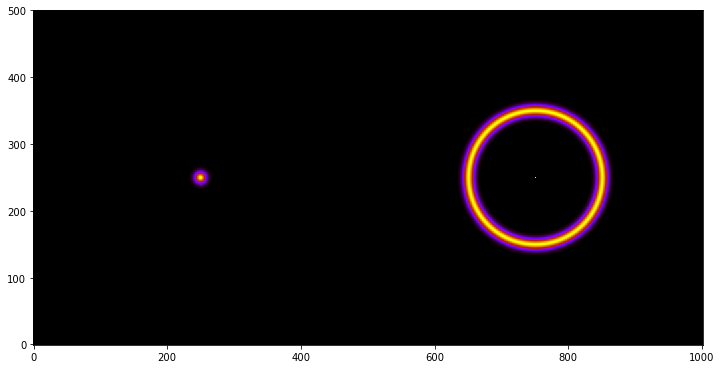

In [10]:
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

# Playing around

## Ilustration of proper motion magnification

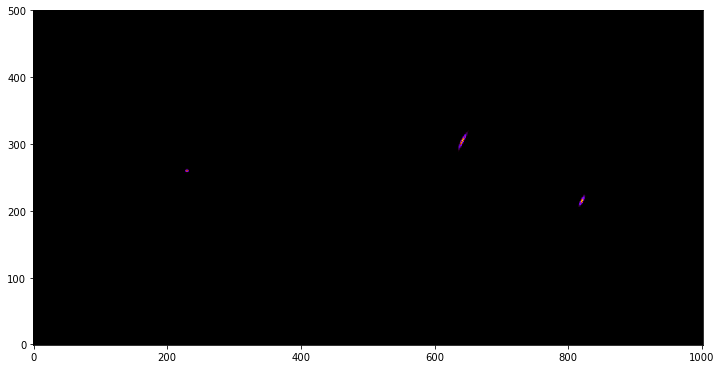

In [33]:
gpar = np.asarray([100.0, 0.01, -0.2, 0.1, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 1.0, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

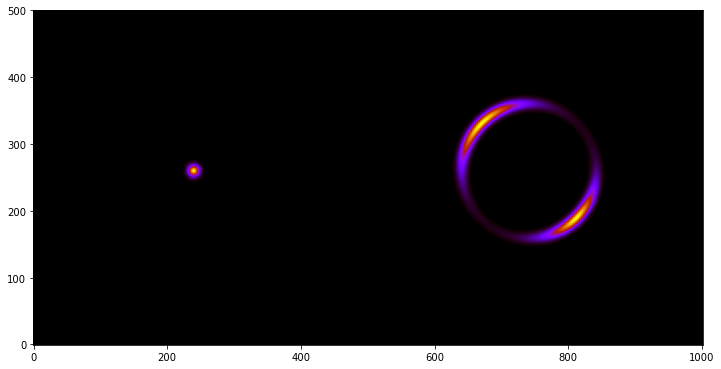

In [12]:
gpar = np.asarray([1.0, 0.05, -0.1, 0.1, 1.0, 0.0])
lpar = np.asarray([1., 0.0, 0.0, 1.0, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

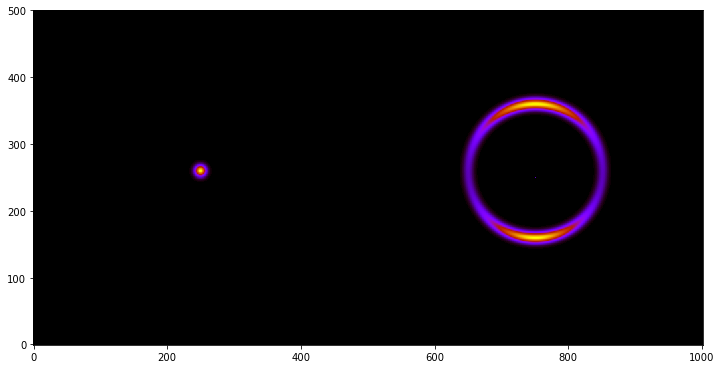

In [13]:
gpar = np.asarray([1.0, 0.05, -0.0, 0.1, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 1.0, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

## Ilustration of proper motion magnification

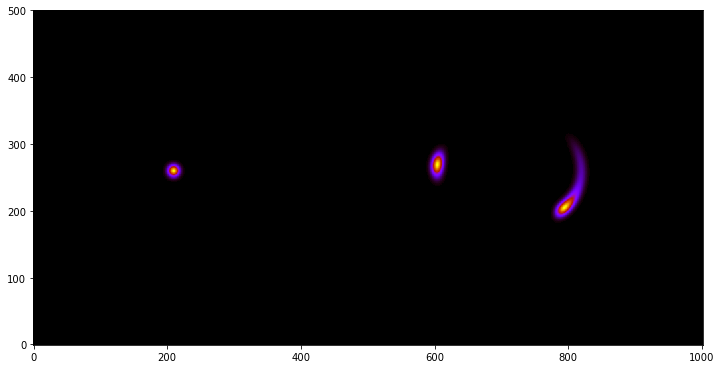

In [14]:
gpar = np.asarray([1.0, 0.05, -0.4, 0.1, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 2.0, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

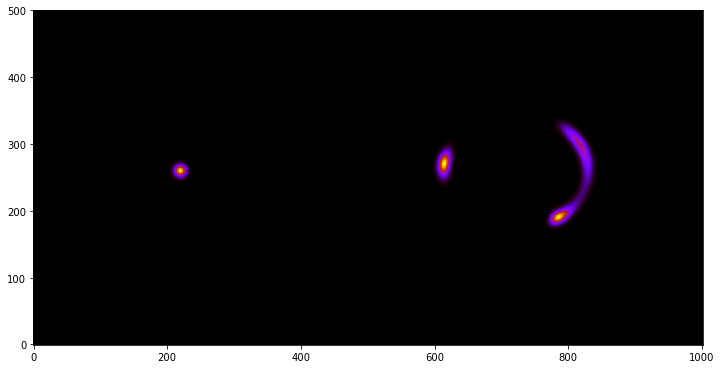

In [15]:
gpar = np.asarray([1.0, 0.05, -0.3, 0.1, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 2.0, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

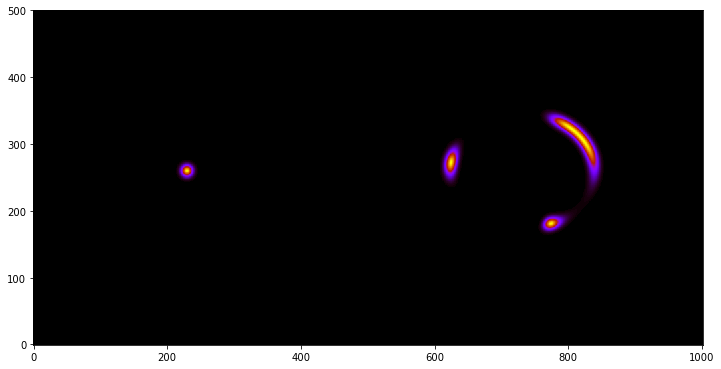

In [16]:
gpar = np.asarray([1.0, 0.05, -0.2, 0.1, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 2.0, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

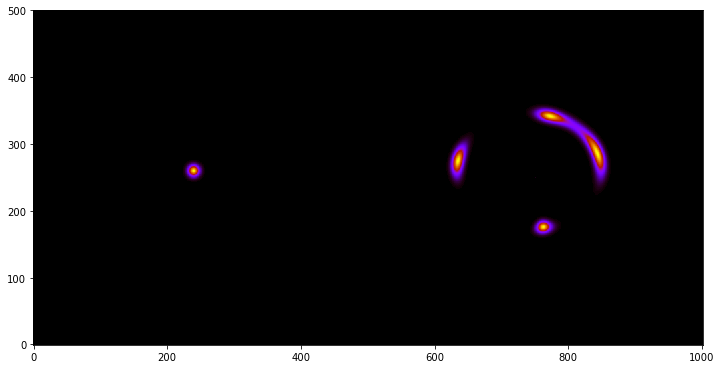

In [17]:
gpar = np.asarray([1.0, 0.05, -0.1, 0.1, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 2.0, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

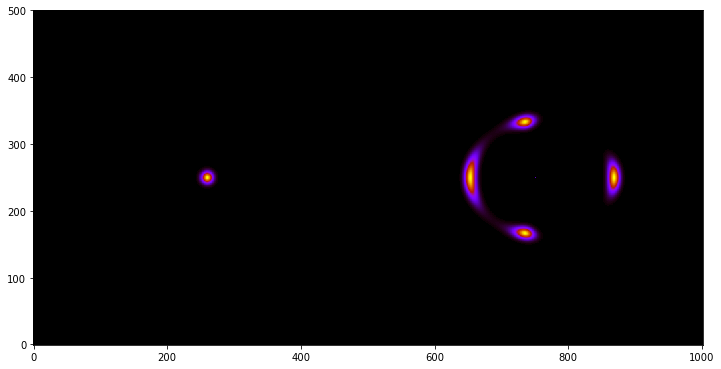

In [26]:
gpar = np.asarray([1.0, 0.05, 0.1, 0.0, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 2, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

# Ilustration of missing counter part detection

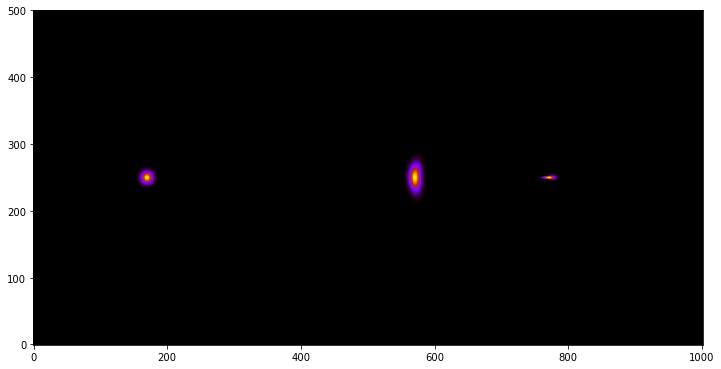

In [166]:
gpar = np.asarray([1.0, 0.05, -0.8 , 0, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 1.0, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

# Illustration of lens elliptisity

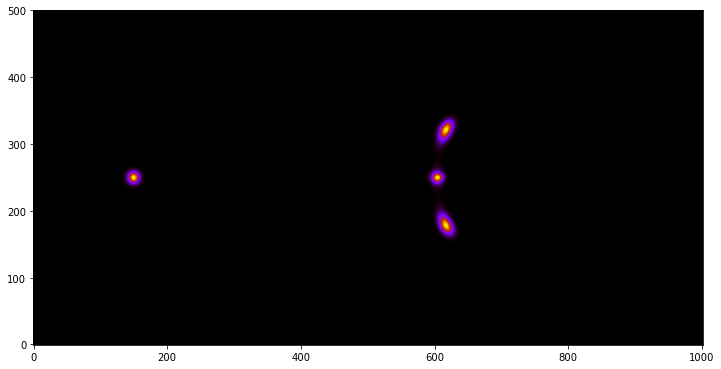

In [179]:
gpar = np.asarray([1.0, 0.05, -1 , 0, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 0.1, 0.0])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)

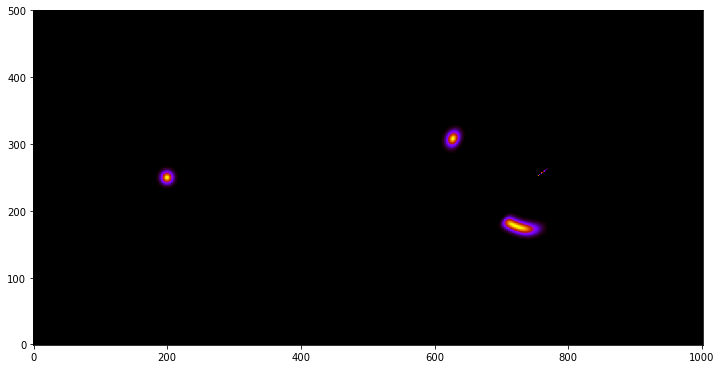

In [191]:
gpar = np.asarray([1.0, 0.05, -0.5 , 0, 1.0, 0.0])
lpar = np.asarray([1.0, 0.0, 0.0, 0.1, 45])
g_image = ldf.gauss_2d(x, y, gpar)
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
f = plt.imshow(np.hstack((g_image, g_lensimage)), **myargs)